In [1]:
#Jia Yi (Susan) Wang
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn
seaborn.set()

In [2]:
genres = pd.read_json('data/genres.json.gz', orient='record', lines=True, encoding='utf-8')
omdb_data = pd.read_json('data/omdb-data.json.gz', orient='record', lines=True, encoding='utf-8')
rt_data = pd.read_json('data/rotten-tomatoes.json.gz', orient='record', lines=True, encoding='utf-8')
wd_data = pd.read_json('data/wikidata-movies.json.gz', orient='record', lines=True, encoding='utf-8')

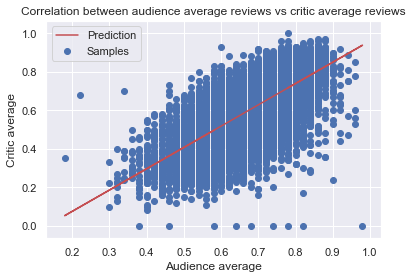

In [3]:
rt_data=rt_data[rt_data.audience_average.notnull()]
rt_data=rt_data[rt_data.critic_average.notnull()]
fit=stats.linregress(rt_data['audience_average']/5, rt_data['critic_average']/10)
rt_data['prediction']=fit.slope*rt_data['audience_average']/5 + fit.intercept
plt.scatter(rt_data['audience_average']/5,rt_data['critic_average']/10)
plt.plot(rt_data['audience_average']/5, rt_data['prediction'],'r-')
plt.title('Correlation between audience average reviews vs critic average reviews')
plt.xlabel('Audience average')
plt.ylabel('Critic average')
plt.legend(['Prediction','Samples'])

In [4]:
print(stats.linregress(rt_data['audience_average']/5, rt_data['critic_average']/10).rvalue)

0.6991003609011144


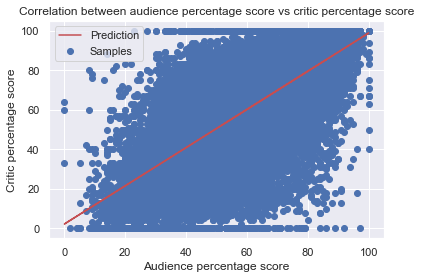

In [5]:
rt_data=rt_data[rt_data.audience_percent.notnull()]
rt_data=rt_data[rt_data.critic_percent.notnull()]
fit=stats.linregress(rt_data['audience_percent'], rt_data['critic_percent'])
rt_data['prediction_2']=fit.slope*rt_data['audience_percent'] + fit.intercept
plt.scatter(rt_data['audience_percent'],rt_data['critic_percent'])
plt.plot(rt_data['audience_percent'], rt_data['prediction_2'],'r-')
plt.title('Correlation between audience percentage score vs critic percentage score')
plt.xlabel('Audience percentage score')
plt.ylabel('Critic percentage score')
plt.legend(['Prediction','Samples'])
#comparing audience percent with critics percent score

In [6]:
print(stats.linregress(rt_data['audience_percent'], rt_data['critic_percent']).rvalue)

0.6872254052712288


In [7]:
wd_data=wd_data[wd_data.made_profit.notnull()]

In [8]:
joined = wd_data.set_index('rotten_tomatoes_id').join(rt_data.set_index('rotten_tomatoes_id'),lsuffix='_wd', rsuffix='_rt',on='rotten_tomatoes_id')
#joined=joined[joined.made_profit.notnull()]
def TorF(num):
    if num==0:
        return False
    elif num==1:
        return True
joined['made_profit']=joined['made_profit'].apply(TorF)

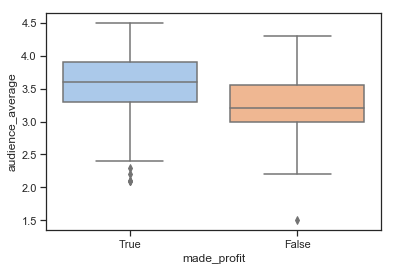

In [9]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

sns.boxplot(x="made_profit", y="audience_average",
            data=joined, order=[True, False])

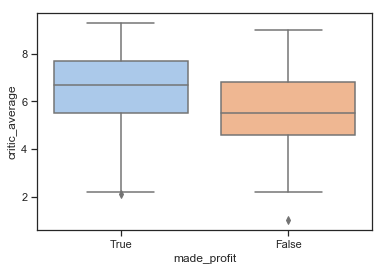

In [10]:
sns.boxplot(x="made_profit", y="critic_average",
            data=joined, order=[True, False])

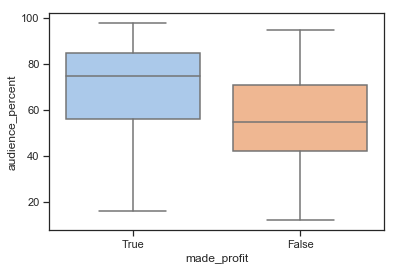

In [11]:
sns.boxplot(x="made_profit", y="audience_percent",
            data=joined, order=[True, False])

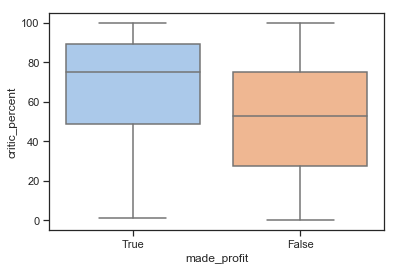

In [12]:
sns.boxplot(x="made_profit", y="critic_percent",
            data=joined, order=[True, False])